<a href="https://colab.research.google.com/github/Yrix90/python/blob/master/DZ_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import autocorrelation_plot

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

Загружаем файл, пропускаем первые строки, так как там информация нас не интересующая

In [6]:
data = pd.read_excel('https://github.com/anastasiarazb/skillbox-data-analyst-intensive/blob/master/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%94%D0%B5%D0%BD%D1%8C%202/IPG2211A2N.xls?raw=true', skiprows = 10)
data

,observation_date,IPG2211A2N
0,1939-01-01,3.3842
1,1939-02-01,3.4100
2,1939-03-01,3.4875
3,1939-04-01,3.5133
4,1939-05-01,3.5133
...,...,...
967,2019-08-01,111.2697
968,2019-09-01,102.0033
969,2019-10-01,93.9993
970,2019-11-01,99.8843


Сортировка правильная

Проверяем какие есть столбцы

In [8]:
data.columns

Index(['observation_date', 'IPG2211A2N'], dtype='object')

Построим общий график функцией plot()
и график усредненых значений с промежутком 12 т.е. 1 год (оранжевый) и 5 лет (зеленый)

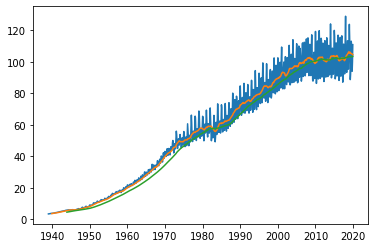

In [33]:
plt.plot(data['observation_date'], data['IPG2211A2N'])
plt.plot(data['observation_date'], data['IPG2211A2N'].rolling(12).mean())
plt.plot(data['observation_date'], data['IPG2211A2N'].rolling(60).mean())

найдем максимальное, минимальное и среднее значение встроенными функциями max(), min(), mean()

In [14]:
max = data['IPG2211A2N'].max()
min = data['IPG2211A2N'].min()
mean = data['IPG2211A2N'].mean()
print('max = ', max, '| min = ', min, '| mean = ', mean)

max =  128.9071 | min =  3.3842 | mean =  54.8019669753087


Это общие значения за 60 лет. Получим данные за каждый год

Выведим график наиболее встречающихся значений функцией hist()

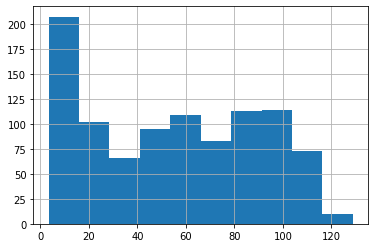

In [15]:
data['IPG2211A2N'].hist()

По данному графику можно судить о том, что значение до 20 встречается чаще, а дальше частота примерно на одном уровне. Это соответсвует общему графику
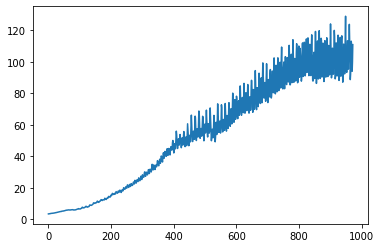


Найдем квантили встроенной функцией quantile()

In [17]:
quantile_95 = data['IPG2211A2N'].quantile(0.95)
quantile_95

109.80760999999998

In [18]:
quantile_05 = data['IPG2211A2N'].quantile(0.05)
quantile_05

5.284245

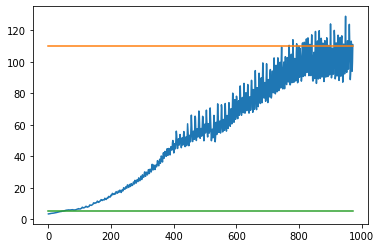

In [19]:
data['IPG2211A2N'].plot()
plt.plot(data.index, [quantile_95] * len(data.index))
plt.plot(data.index, [quantile_05] * len(data.index))

Данные о квантилях не дают нам полезной информации, график восходящий и если его продолжить то и верхний квантиль будет возростать. 

График автокорреляции autocorrelation_plot

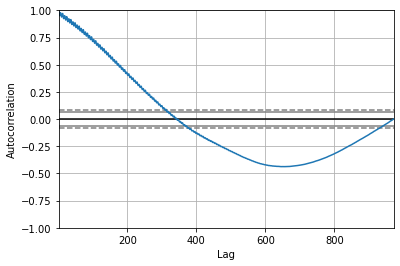

In [20]:
autocorrelation_plot(data['IPG2211A2N'])

Из данного графика можно сделать вывод, что данные не повторяются с какой либо периодичностью, что соответсвует первоначальному графику.
Данные растут постепенно

Строим регрессию, прямую линию между точками

In [0]:
regressor = LinearRegression()

x_range список последовательности чисел длинной dataset

In [0]:
x_range = list(range(0, len(data)))

table таблица c 1 столбцом



In [36]:
table = pd.DataFrame(x_range)

,0
0,0
1,1
2,2
3,3
4,4
...,...
967,967
968,968
969,969
970,970


Строим линейную регрессию

In [37]:
regressor.fit(pd.DataFrame(x_range), data['IPG2211A2N'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Выводим график линейной регрессии

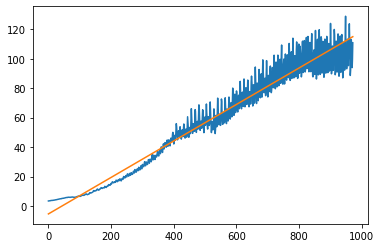

In [40]:
data['IPG2211A2N'].plot()
plt.plot(data.index, regressor.predict(pd.DataFrame(x_range)))

Вывод:
Значения по данному dataset линейно увеличиваются с каждым годом о чем свидетельстует модель линейной регрессии и построенный график по данным из dataset.